# Video Games Sales Analysis

This project will analyze the data of the top video games sales over the past 40 years, starting from 1980. The data will contain the games with the highest amount of sales overall, as well as their sales in three seperate regions, namely - North America, Europe and Japan. The games will be of different genres and across different game platforms as well. Now, let's get started. 

## Importing libraries

Firstly, we need to import the necessary libraries to analyze the data. We'll be needing Pandas and Numpy for the data cleaning and analysis, as well as Matplotlib and Seaborn for the data visualization purposes.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Importing the dataset

Next, we import the csv file containing the sales data. Then we read the data into a dataframe.

In [2]:
df = pd.read_csv('vgsales.csv')
df.head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


We'll check for the shape of the dataframe and the number of non-null values in the columns.

In [3]:
print(df.shape)
df.count()

(16598, 11)


Rank            16598
Name            16598
Platform        16598
Year            16327
Genre           16598
Publisher       16540
NA_Sales        16598
EU_Sales        16598
JP_Sales        16598
Other_Sales     16598
Global_Sales    16598
dtype: int64

The dataframe has 16598 rows and 11 columns. Out of those 11 columns, only the "Year" and the "Publisher" columns have some null values in them. Now, we drop the null values from the dataframe.

In [4]:
df = df.dropna()
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


If we check the column values of the modified dataframe now, we'll find that all the columns have equal number of values and are devoid of null values.

In [5]:
df.count()

Rank            16291
Name            16291
Platform        16291
Year            16291
Genre           16291
Publisher       16291
NA_Sales        16291
EU_Sales        16291
JP_Sales        16291
Other_Sales     16291
Global_Sales    16291
dtype: int64

Now, we check the datatypes for all the columns.

In [6]:
df.dtypes

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

## Data Analysis & Visualization

### Total & Average Sales Data Analysis

Now, we set up the Matplotlib/Seaborn to visualize the data. We'll now start grouping the data based on the categories of "Platform", "Year" and "Genre". First, we group the data based on the gaming platforms in terms of total global sales.

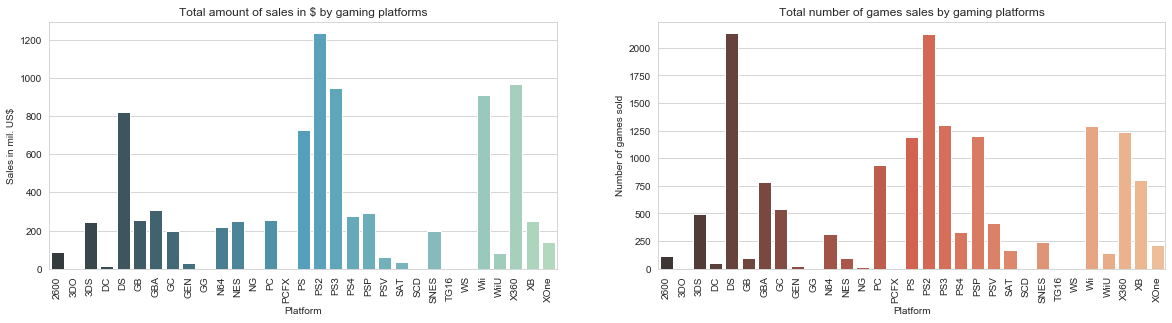

In [7]:
%matplotlib inline

sns.set_style('whitegrid')

plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
plf = df.groupby('Platform')['Global_Sales'].sum()
plfg = sns.barplot(x=plf.index, y=plf, palette="GnBu_d")
plt.ylabel('Sales in mil. US$')
plt.title('Total amount of sales in $ by gaming platforms')
plfg.set_xticklabels(plfg.get_xticklabels(), rotation=90)

plt.subplot(2,2,2)
plf = df.groupby('Platform')['Global_Sales'].count()
plfg = sns.barplot(x=plf.index, y=plf, palette="OrRd_d")
plt.ylabel('Number of games sold')
plt.title('Total number of games sales by gaming platforms')
plfg.set_xticklabels(plfg.get_xticklabels(), rotation=90)

plt.show()

Based on the platforms, games targeted at the PS2 gaming platform has the highest number of sales in the list, with the only ones reaching a total over a billion US dollars. The other platforms close to a billion are the X360, PS3, Nintendo Wii and Nintendo DS, with sales going over 800 million dollars for all of them. Now, let's check on the average global sales for each of the gaming platforms.

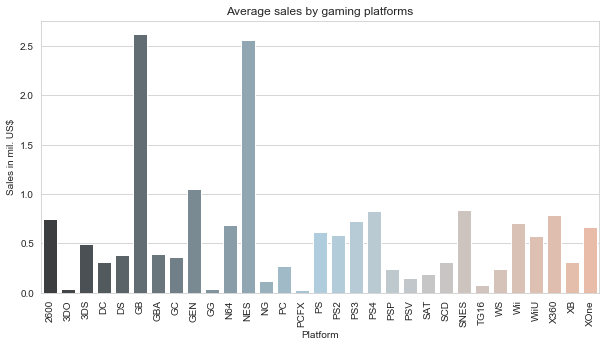

In [8]:
sns.set_style('whitegrid')

plt.figure(figsize=(10,5))

plf = df.groupby('Platform')['Global_Sales'].mean()
plfg = sns.barplot(x=plf.index, y=plf, palette="RdBu_d")
plt.ylabel('Sales in mil. US$')
plt.title('Average sales by gaming platforms')
plfg.set_xticklabels(plfg.get_xticklabels(), rotation=90)


plt.show()

Looking at the average sales graph, the scene is a bit different. Here, the games in the GB and the NES format have the largest amount of sales per game, indicating the price for these games are higher than the other platform games. Platforms which had the higher total sales are very low when in terms of average sales, indicating cheaper games which might attract gamers to buy.

We'll now visualize the data grouped by the release years. First in terms of total global sales.

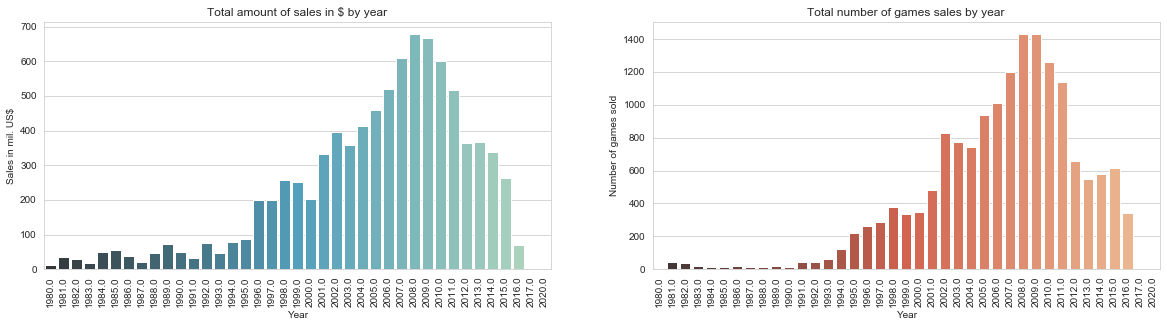

In [9]:
sns.set_style('whitegrid')

plt.figure(figsize=(20,10))

plt.subplot(2,2,1)
yearly = df.groupby('Year')['Global_Sales'].sum()
yrlg = sns.barplot(x=yearly.index, y=yearly, palette="GnBu_d")
plt.ylabel('Sales in mil. US$')
plt.title('Total amount of sales in $ by year')
yrlg.set_xticklabels(yrlg.get_xticklabels(), rotation=90)

plt.subplot(2,2,2)
yearly = df.groupby('Year')['Global_Sales'].count()
yrlg = sns.barplot(x=yearly.index, y=yearly, palette="OrRd_d")
plt.ylabel('Number of games sold')
plt.title('Total number of games sales by year')
yrlg.set_xticklabels(yrlg.get_xticklabels(), rotation=90)

plt.show()

As per the graph above, the years with the highest amount of game sales are centred around the period between 2005 and 2011, with the highest sales coming in the year 2008. This coincides with the previous graph which dealt with the gaming platforms, as this period was the time for platforms such as PS2, PS3 and Nintendo DS, which are the platforms with the highest amount of game sales. Hence, this explains the period's huge sales boom compared to the earlier or later periods. Time to check on the average game sales in terms of release years. 

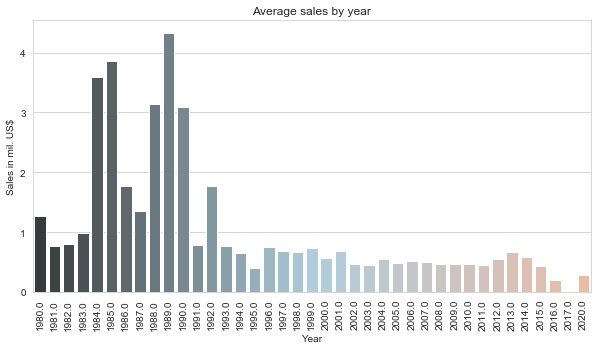

In [10]:
sns.set_style('whitegrid')

plt.figure(figsize=(10,5))

yearly = df.groupby('Year')['Global_Sales'].mean()
yrlg = sns.barplot(x=yearly.index, y=yearly, palette="RdBu_d")
plt.ylabel('Sales in mil. US$')
plt.title('Average sales by year')
yrlg.set_xticklabels(yrlg.get_xticklabels(), rotation=90)

plt.show()

As per the above graph, the average game sales situation are much different than the total sales. Here, the period before 1990 had much higher average sales than the period into the 90's and beyond. This could indicate the games back then being more expensive as in the total sales graph, this particular period had really low sales compared to the 2000's and beyond. Also opposite is the period after 2000's, where the average sales are the lowest, and yet, the total sales had skyrocketed. Therefore, in conclusion, video games have become much more viable to the commonfolk and hence, the total sales have increased drastically.

Next, we'll visualize the data grouped by the genres. First, let's take a look at the total sales for each genre.

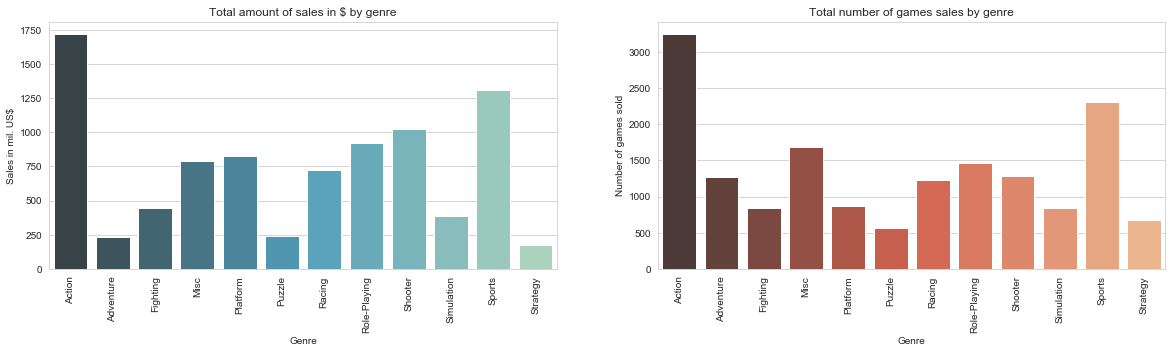

In [11]:
sns.set_style('whitegrid')

plt.figure(figsize=(20,10))

plt.subplot(2,2,1)
gnr = df.groupby('Genre')['Global_Sales'].sum()
gnrg = sns.barplot(x=gnr.index, y=gnr, palette="GnBu_d")
plt.ylabel('Sales in mil. US$')
plt.title('Total amount of sales in $ by genre')
gnrg.set_xticklabels(gnrg.get_xticklabels(), rotation=90)

plt.subplot(2,2,2)
gnr = df.groupby('Genre')['Global_Sales'].count()
gnrg = sns.barplot(x=gnr.index, y=gnr, palette="OrRd_d")
plt.ylabel('Number of games sold')
plt.title('Total number of games sales by genre')
gnrg.set_xticklabels(gnrg.get_xticklabels(), rotation=90)

plt.show()

As per the graph above, the action genre is by far the most popular type of games, with sales reaching close to 1.75 billion dollars. The nearest genre of games are the sports based games, with sales just over a quarter of a billion dollars. The only other type of games which have crossed the billion dollar mark in sales is the shooter type games, which can also overlap a lot with action based games, for example - Call of Duty or the Far Cry series, both encompass action and shooter game elements. Therefore, action based games overall have the highest amount of sales compared to the other genres. Let's look at the average sales for games in each genre.

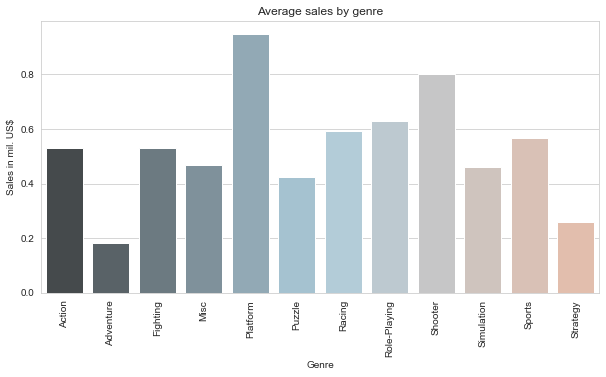

In [12]:
sns.set_style('whitegrid')

plt.figure(figsize=(10,5))

gnr = df.groupby('Genre')['Global_Sales'].mean()
gnrg = sns.barplot(x=gnr.index, y=gnr, palette="RdBu_d")
plt.ylabel('Sales in mil. US$')
plt.title('Average sales by genre')
gnrg.set_xticklabels(gnrg.get_xticklabels(), rotation=90)

plt.show()

As per the above graph, the platform oriented games have the highest of all the average game sales, indicating the high price of these games. Next in line, are the shooter games and role-playing games. The action and sports games, which are the frontrunners for the total sales are much lower in terms of average sales, indicating cheaper prices.

### Analysis of the Top Grossing Video Games in terms of Regional Sales

Now, we'll try to find out the top grossing video games among the entire list. The priority is to locate the games with global sales in excess of 20 million US$. So, we filter out the original dataframe based on such filter. 

In [13]:
df1 = df[df['Global_Sales'] > 20]
df1.head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


In [14]:
print(df1.shape)

(20, 11)


As per the shape of the new dataframe, the total number of games in excess of 20 million US$ in sales is 20. Hence, now we try to analyze this dataframe based on parameters like Publisher and later regionwise sales. Let's start with the game publishers.

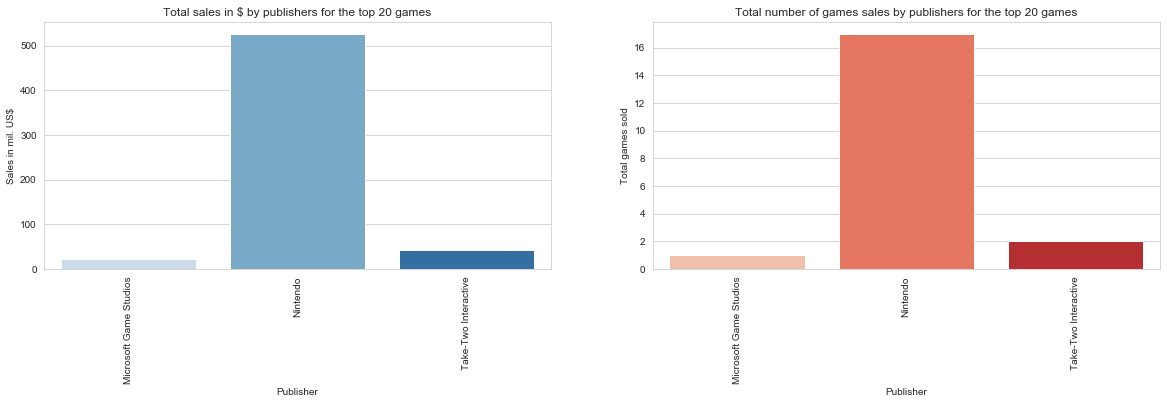

In [15]:
sns.set_style('whitegrid')

plt.figure(figsize=(20,10))

plt.subplot(2,2,1)
pbr = df1.groupby('Publisher')['Global_Sales'].sum()
pbrg = sns.barplot(x=pbr.index, y=pbr, palette="Blues")
plt.ylabel('Sales in mil. US$')
plt.title('Total sales in $ by publishers for the top 20 games')
pbrg.set_xticklabels(pbrg.get_xticklabels(), rotation=90)

plt.subplot(2,2,2)
pbr = df1.groupby('Publisher')['Global_Sales'].count()
pbrg = sns.barplot(x=pbr.index, y=pbr, palette="Reds")
plt.ylabel('Total games sold')
plt.title('Total number of games sales by publishers for the top 20 games')
pbrg.set_xticklabels(pbrg.get_xticklabels(), rotation=90)

plt.show()

As per the above graph, Nintendo dominates the top grossing games chart with over 500 million US$ worth in sales. The nearest competitor is Take-Two Interactive, with under 50 million dollars in sales, only a meager 10 percent of Nintendo's share.

Now, let's take alook at the total sales breakdown of the top 20 games in terms of it's gaming platform.

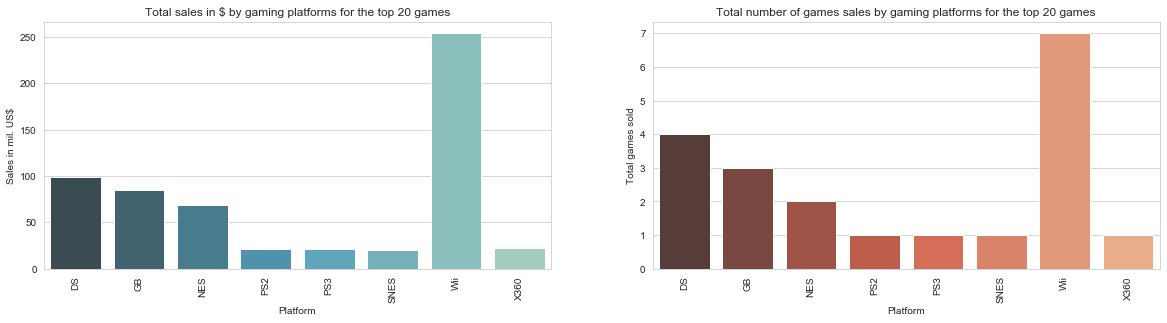

In [16]:
sns.set_style('whitegrid')

plt.figure(figsize=(20,10))

plt.subplot(2,2,1)
plf = df1.groupby('Platform')['Global_Sales'].sum()
plfg = sns.barplot(x=plf.index, y=plf, palette="GnBu_d")
plt.ylabel('Sales in mil. US$')
plt.title('Total sales in $ by gaming platforms for the top 20 games')
plfg.set_xticklabels(plfg.get_xticklabels(), rotation=90)

plt.subplot(2,2,2)
plf = df1.groupby('Platform')['Global_Sales'].count()
plfg = sns.barplot(x=plf.index, y=plf, palette="OrRd_d")
plt.ylabel('Total games sold')
plt.title('Total number of games sales by gaming platforms for the top 20 games')
plfg.set_xticklabels(plfg.get_xticklabels(), rotation=90)

plt.show()

Among the top 20 games, the Wii platform has had the most amount of top grossing games, as indicated by it's incredible amount of sales, 250 million US$ to be exact. The nearest contending platform is Nintendo DS, with 100 million in sales, followed by GB with close to 75 million. All of these platforms are Nintendo owned, which in connection to the previous graph of top grossing publishers, makes complete sense, as Nintendo has the highest amount of sales among the platforms. Now, let's break the global sales down to the three regions sales in the following graph.

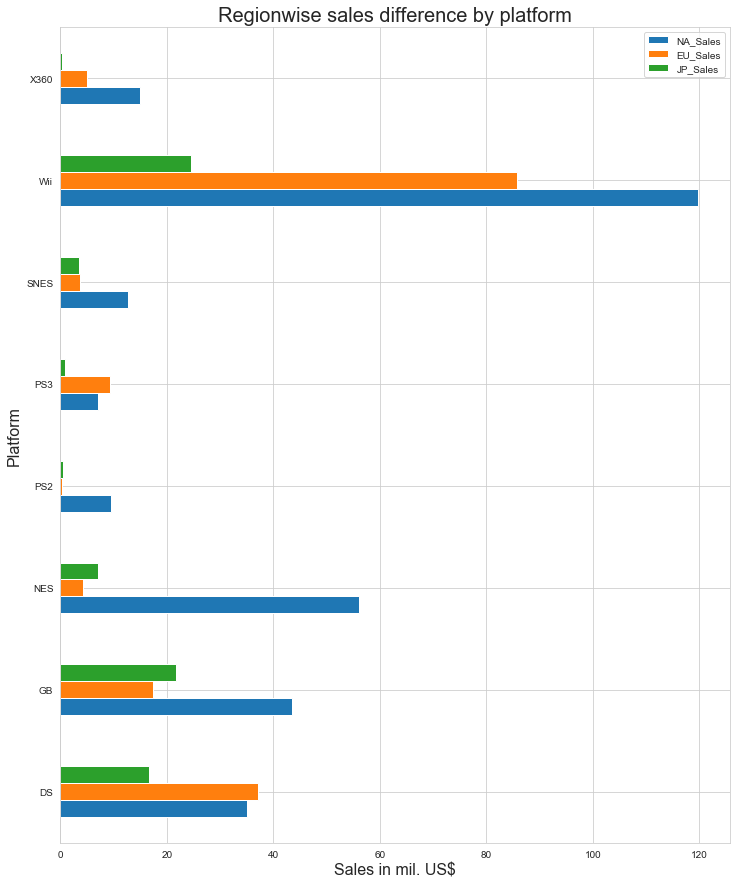

In [17]:
salesbyplatform = df1.groupby('Platform').sum()
salesbyplatform = salesbyplatform[['NA_Sales', 'EU_Sales', 'JP_Sales']]
salesbyplatform.plot(kind='barh', figsize=(12,15))

sns.set_style('whitegrid')
plt.title('Regionwise sales difference by platform',fontsize=20)
plt.xlabel('Sales in mil. US$',fontsize=16)
plt.ylabel('Platform',fontsize=16)

plt.show()

As per the graph, the three regions are North America, Europe and Japan. In the graph, on average, the North American sales are generally higher than the sales in Japan and Europe. The only exceptions are PS3 and DS, where the European sales are the highest.

Now, let's take a look at the yearly breakdown for the top 20 highest games, first globally and then regionwise.

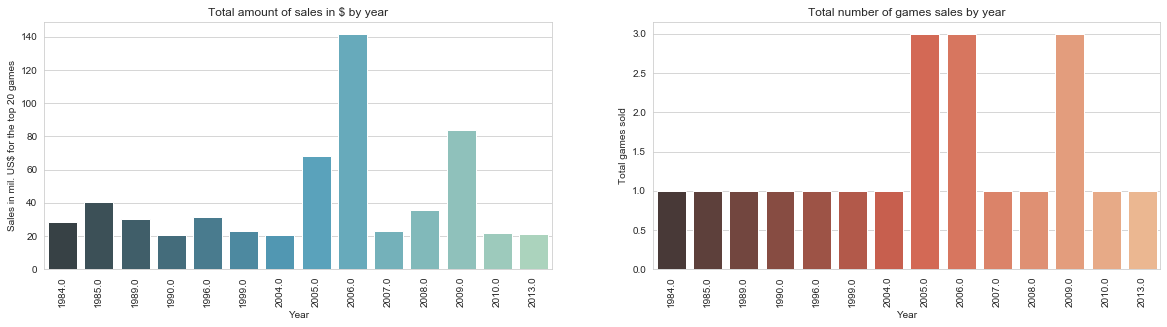

In [18]:
sns.set_style('whitegrid')

plt.figure(figsize=(20,10))

plt.subplot(2,2,1)
yearly = df1.groupby('Year')['Global_Sales'].sum()
yrlg = sns.barplot(x=yearly.index, y=yearly, palette="GnBu_d")
plt.ylabel('Sales in mil. US$ for the top 20 games')
plt.title('Total amount of sales in $ by year')
yrlg.set_xticklabels(yrlg.get_xticklabels(), rotation=90)

plt.subplot(2,2,2)
yearly = df1.groupby('Year')['Global_Sales'].count()
yrlg = sns.barplot(x=yearly.index, y=yearly, palette="OrRd_d")
plt.ylabel('Total games sold')
plt.title('Total number of games sales by year')
yrlg.set_xticklabels(yrlg.get_xticklabels(), rotation=90)

plt.show()

As per the above graph, the year with the highest amount of sales is 2006, followed by 2009. 2006 had the highest amount of sales by a huge margin, with over 140 million. In 2009, the sales are over just 80 million, which is almost half of the amount in 2006.

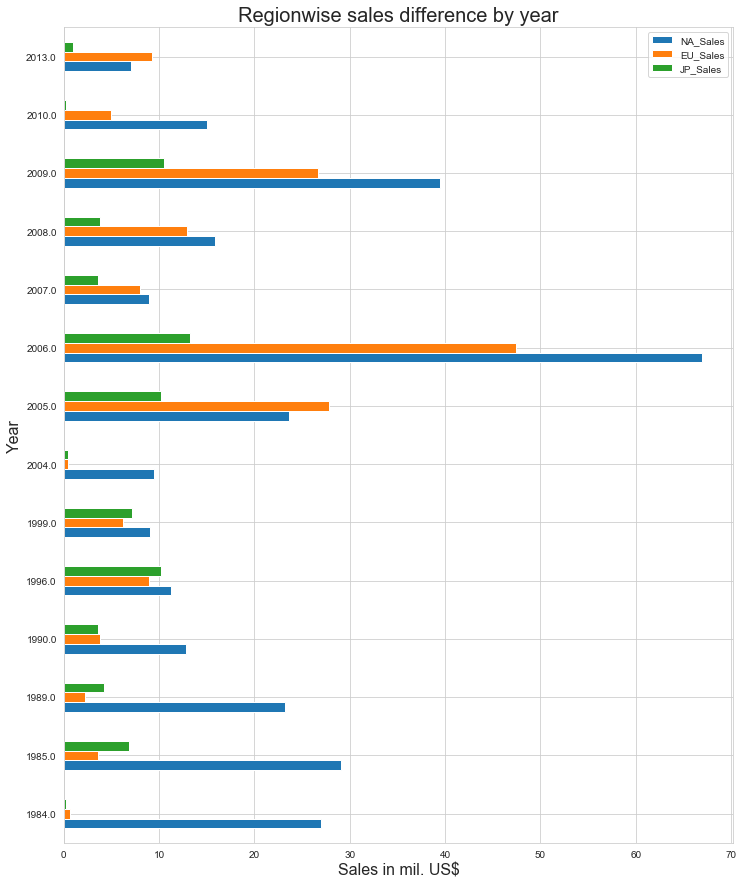

In [19]:
salesbyyear = df1.groupby('Year').sum()
salesbyyear = salesbyyear[['NA_Sales', 'EU_Sales', 'JP_Sales']]
salesbyyear.plot(kind='barh', figsize=(12,15))

sns.set_style('whitegrid')
plt.title('Regionwise sales difference by year',fontsize=20)
plt.xlabel('Sales in mil. US$',fontsize=16)
plt.ylabel('Year',fontsize=16)

plt.show()

As like the previous regionwise breakdown, on average, the North American sales are the highest. The exceptions are the years 2005 & 2013, where the European sales were greater.

Finally, let's breakdown the global sales and the regionwise sales of the top grossing games based on the genre.

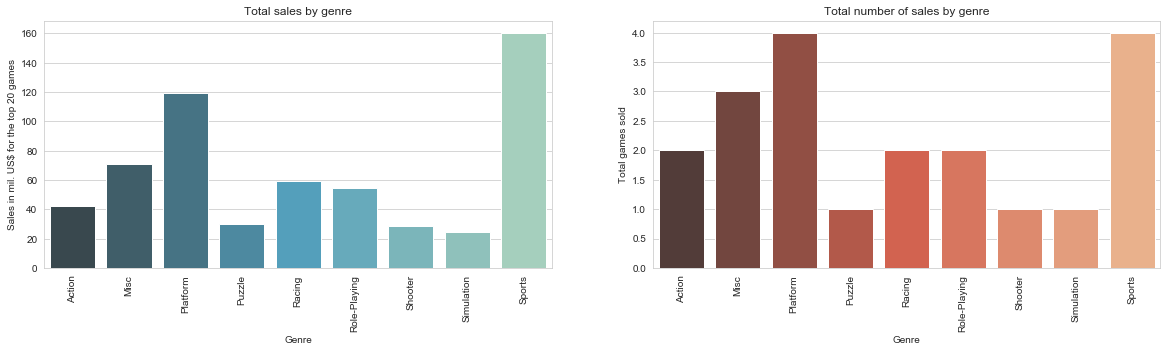

In [20]:
sns.set_style('whitegrid')

plt.figure(figsize=(20,10))

plt.subplot(2,2,1)
gnr = df1.groupby('Genre')['Global_Sales'].sum()
gnrg = sns.barplot(x=gnr.index, y=gnr, palette="GnBu_d")
plt.ylabel('Sales in mil. US$ for the top 20 games')
plt.title('Total sales by genre')
gnrg.set_xticklabels(gnrg.get_xticklabels(), rotation=90)

plt.subplot(2,2,2)
gnr = df1.groupby('Genre')['Global_Sales'].count()
gnrg = sns.barplot(x=gnr.index, y=gnr, palette="OrRd_d")
plt.ylabel('Total games sold')
plt.title('Total number of sales by genre')
gnrg.set_xticklabels(gnrg.get_xticklabels(), rotation=90)

plt.show()

The top most grossing genre is sports, followed by platform games. Since, Nintendo focuses on sports and platform games like - Mario Cart Racing and Super Mario, the graph makes logical sense.

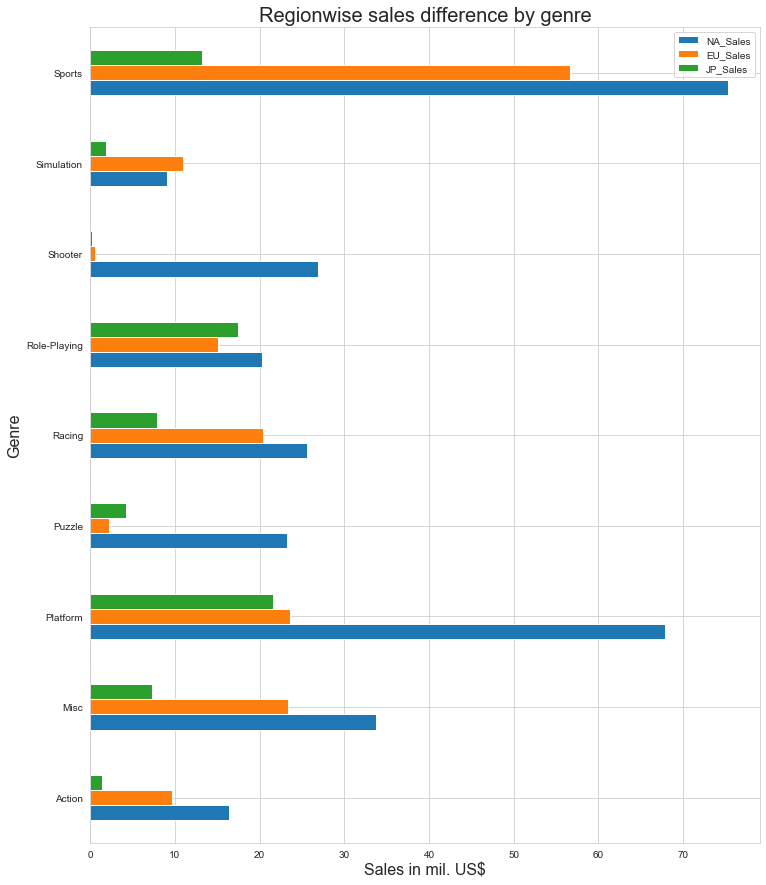

In [21]:
salesbygenre = df1.groupby('Genre').sum()
salesbygenre = salesbygenre[['NA_Sales', 'EU_Sales', 'JP_Sales']]
salesbygenre.plot(kind='barh', figsize=(12,15))

sns.set_style('whitegrid')
plt.title('Regionwise sales difference by genre',fontsize=20)
plt.xlabel('Sales in mil. US$',fontsize=16)
plt.ylabel('Genre',fontsize=16)

plt.show()

As like the previous graphs, with only one exception, the Northj American sales are the highest among all the genres. The only exception is simulation games, which had more sales in Europe.